<a href="https://colab.research.google.com/github/revanthmadasu/machine-learning/blob/master/mental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_hub
!pip install keras tf-models-official pydot graphviz
import os
import pandas as pd
import numpy as np
import nltk
import string
import re
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import seaborn as sn
import tensorflow as tf
import tensorflow_hub as hub
from google.colab import drive

from keras.utils import np_utils

# import official.nlp.bert.bert_models
# import official.nlp.bert.configs
# import official.nlp.bert.run_classifier
# import official.nlp.bert.tokenization as tokenization

from official.modeling import tf_utils
from official import nlp
# from official.nlp import bert

from sklearn.preprocessing import LabelEncoder


from seaborn import heatmap
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import recall_score

#!pip install 'neptune-contrib[monitoring]>=0.24.9'
# import neptune

# from neptunecontrib.monitoring.xgboost_monitor import neptune_callback
# neptune.init('shared/XGBoost-integration',
#              api_token='ANONYMOUS')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.4 MB/s 
     |████████████████████████████████| 352 kB 65.1 MB/s 
     |████████████████████████████████| 511.7 MB 5.8 kB/s 
     |████████████████████████████████| 99 kB 8.8 MB/s 
     |████████████████████████████████| 48.3 MB 1.5 MB/s 
     |████████████████████████████████| 636 kB 44.6 MB/s 
     |████████████████████████████████| 116 kB 57.1 MB/s 
     |████████████████████████████████| 238 kB 55.9 MB/s 
     |████████████████████████████████| 4.6 MB 46.7 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 1.1 MB 46.1 MB/s 
     |████████████████████████████████| 1.2 MB 37.1 MB/s 
     |████████████████████████████████| 1.6 MB 62.9 MB/s 
     |████████████████████████████████| 5.8 MB 33.5 

In [ ]:
string.punctuation
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving posts.csv to posts.csv


In [ ]:
#import codecs
#with codecs.open(posts.csv, 'r', encoding='utf-8',
                 #errors='ignore') as fdata:
dataset = pd.read_csv("/content/posts.csv", delimiter=',', encoding='latin-1', engine='python')

#dataset = pd.read_csv("/content/posts.csv",  encoding='latin-1', sep='|', quoting=3, error_bad_lines=False)
pd.set_option('display.max_colwidth' , 300)
print(dataset.shape)
dataset.head()

(242358, 2)


,message,class
0,i think i'm actually gonna do iti planned on doing it in august by carbon monoxide poisoning. but i don't think i can make it through this week. i dont think i can handle one more day like this,suicide
1,"Listening to chillsteps andPlanning on a certain death of mine, at a certain time. My body has flown the ages and its home all disengages a thoughtful drunk proposal in the 6s of our rages, every page drowning in the signature of NaSO2, a certain strangulation to be had by ingestion a salt of ye...",suicide
2,"For the past 3 days, all I can think about is suicideI don't know how it began exactly. I have been dealing with depression (although I have never talked to a doctor yet, I call it depression none the less) for almost a year now, and I have always had on and off thoughts about killing myself, bu...",suicide
3,"If I ever do a suicid e charge, put me in the list of survivors. So to confuse everyone. And tell me wife that she's my wife, cause I'm single.... just find me one",normal
4,Hey you. Yea. You. Play among us. Iâm hosting a game right now you can join if u want nobody has yet. Game code is JREWEQ,normal


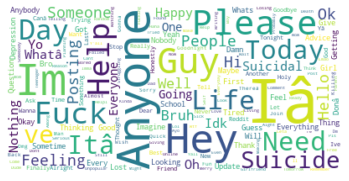

In [ ]:
from wordcloud import WordCloud

#Checking for NaN values
dataset.isna().sum()
#Removing NaN Values
#df.dropna(inplace = True)
#Creating the text variable
text = " ".join(cat.split()[0] for cat in dataset.message)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk
nltk.download('omw-1.4')
def clean_text(txt):
  remove_pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
  txt = remove_pattern.sub('', str(txt))
  txt = "".join([c for c in txt if c not in string.punctuation])
  remove_emoji = re.compile("["
                    u"\U0001F600-\U0001FFFF"  # emoticons
                    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                    u"\U0001F680-\U0001F6FF"  # transport & map symbols
                    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                    u"\U00002702-\U000027B0"
                    u"\U000024C2-\U0001F251"
                    "]+", flags=re.UNICODE)
  txt = remove_emoji.sub(r'', txt)
  tokens = word_tokenize(txt.lower())
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  words = [word for word in stripped if word.isalpha()]
  txt = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords]
  return txt

dataset['cleanpost'] = dataset['message'].apply(lambda x: clean_text(x))

# rumor_df=rumor_df.replace(to_replace="real",value="1")
# rumor_df=rumor_df.replace(to_replace="fake",value="0")

# mapping = {'real': 1, 'false': 2}
# rumor_df.replace({'real': mapping, 'false': mapping})

# fakeOrreal = {'fake' : 0 , 'real' : 1 }
# rumor_df['label'] = rumor_df['label'].map(fakeOrreal)
dataset.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,message,class,cleanpost
0,i think i'm actually gonna do iti planned on doing it in august by carbon monoxide poisoning. but i don't think i can make it through this week. i dont think i can handle one more day like this,suicide,"[think, im, actually, gon, na, iti, planned, august, carbon, monoxide, poisoning, dont, think, make, week, dont, think, handle, one, day, like]"
1,"Listening to chillsteps andPlanning on a certain death of mine, at a certain time. My body has flown the ages and its home all disengages a thoughtful drunk proposal in the 6s of our rages, every page drowning in the signature of NaSO2, a certain strangulation to be had by ingestion a salt of ye...",suicide,"[listening, chillsteps, andplanning, certain, death, mine, certain, time, body, flown, age, home, disengages, thoughtful, drunk, proposal, 6, rage, every, page, drowning, signature, naso2, certain, strangulation, ingestion, salt, yellowish, biletones, sage, like, nightmare, babyformyoda, raping,..."
2,"For the past 3 days, all I can think about is suicideI don't know how it began exactly. I have been dealing with depression (although I have never talked to a doctor yet, I call it depression none the less) for almost a year now, and I have always had on and off thoughts about killing myself, bu...",suicide,"[past, 3, day, think, suicidei, dont, know, began, exactly, dealing, depression, although, never, talked, doctor, yet, call, depression, none, le, almost, year, always, thought, killing, past, 3, day, straight, thinking, suicide, could, never, see, ever, killing, always, think, could, would, die..."
3,"If I ever do a suicid e charge, put me in the list of survivors. So to confuse everyone. And tell me wife that she's my wife, cause I'm single.... just find me one",normal,"[ever, suicid, e, charge, put, list, survivor, confuse, everyone, tell, wife, shes, wife, cause, im, single, find, one]"
4,Hey you. Yea. You. Play among us. Iâm hosting a game right now you can join if u want nobody has yet. Game code is JREWEQ,normal,"[hey, yea, play, among, u, iâm, hosting, game, right, join, u, want, nobody, yet, game, code, jreweq]"


In [ ]:
def tfidfvec(data, ngrams=(1,1)):
  Vectorizer1 = TfidfVectorizer(ngram_range=ngrams, analyzer=clean_text)
  tfidf = Vectorizer1.fit_transform(data)
  return tfidf, Vectorizer1
tfidf, Vectorizer1  = tfidfvec(dataset['cleanpost'])

In [ ]:
[x for x in tfidf.todense()[0][0:].tolist()[0] if x!= 0]

In [ ]:
tfidf, Vectorizer1 = tfidfvec(dataset['cleanpost']) 

In [ ]:
tfidf, Vectorizer1 = tfidfvec(dataset['cleanpost'], ngrams=(1,2))  
print(tfidf.todense()[0][0:].sum())

In [ ]:
Vectorizer1.get_feature_names()

In [ ]:
data = dataset["cleanpost"]
label = dataset["class"]
# label = pd.factorize(rumor_df['label'])[0].reshape(-1, 1) 
[data_train, data_test, label_train, label_test] = train_test_split(tfidf, label, test_size=0.25, random_state=2, stratify=label)

In [ ]:
from sklearn. preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
data_train = sc.fit_transform(data_train)
data_test = sc.transform(data_test)